In [25]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import arabic_reshaper
from bidi.algorithm import get_display
import os
import codecs
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

# Reading Arabic_tweets_positive dataset

In [20]:
#set erro_bad_lines = False, it needed when the csv has too many commas
cols = ['class','tweet_text']
positive = pd.read_csv('data/Arabic_tweets_positive_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [21]:
positive.head(50)

,class,tweet_text
0,pos,علييك الله قفل ميتينك ❤
1,pos,طيار عراقي يسال برج المراقبة في سلطنة عمان عن ...
2,pos,علمهم تكفى حسبي الله عليهم 🙂
3,pos,🍀 وعن ذكر الله لا تغفلون لا إله إلا الله لا إل...
4,pos,كثير من جمهور #الاهلي يقول لي عطنا تشكيلة #اله...
5,pos,"🦋 . . . . ""فيني #قليل من الفرح وأغلب تفاصيلي ز..."
6,pos,#الاهلي_الهلال الحمدلله 💙 آه يا عمري يا الزعيم...
7,pos,أغنية تايلور سويفت #القوس مع غاري لايتبودي #ال...
8,pos,🌅 تذكير مهم 🌅 . قال رسول الله ﷺ: لا يحافظ على ...
9,pos,"جنابو زاتو محتار "" اتنين في يومين يجماعه"" 😂"


# Total no. of positive twittes

In [22]:
len(positive)

28536

# Sample of the positive twittes text

In [23]:
positive['tweet_text'].head(10)

0                              علييك الله قفل ميتينك ❤
1    طيار عراقي يسال برج المراقبة في سلطنة عمان عن ...
2                         علمهم تكفى حسبي الله عليهم 🙂
3    🍀 وعن ذكر الله لا تغفلون لا إله إلا الله لا إل...
4    كثير من جمهور #الاهلي يقول لي عطنا تشكيلة #اله...
5    🦋 . . . . "فيني #قليل من الفرح وأغلب تفاصيلي ز...
6    #الاهلي_الهلال الحمدلله 💙 آه يا عمري يا الزعيم...
7    أغنية تايلور سويفت #القوس مع غاري لايتبودي #ال...
8    🌅 تذكير مهم 🌅 . قال رسول الله ﷺ: لا يحافظ على ...
9          جنابو زاتو محتار " اتنين في يومين يجماعه" 😂
Name: tweet_text, dtype: object

# Sample of the target 

In [24]:
positive['class'].head()

0    pos
1    pos
2    pos
3    pos
4    pos
Name: class, dtype: object

# EDA on the postive dataset

In [25]:
np.sum(positive.isnull().any(axis=1))

0

In [26]:
positive.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [27]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       28536 non-null  object
 1   tweet_text  28536 non-null  object
dtypes: object(2)
memory usage: 446.0+ KB


# Cleaning the text

In [28]:
for letter in '#.][!XRﷺ':
    positive['tweet_text'] = positive['tweet_text'].astype(str).str.replace(letter,'')

In [29]:
positive.head(10)

,class,tweet_text
0,pos,علييك الله قفل ميتينك ❤
1,pos,طيار عراقي يسال برج المراقبة في سلطنة عمان عن ...
2,pos,علمهم تكفى حسبي الله عليهم 🙂
3,pos,🍀 وعن ذكر الله لا تغفلون لا إله إلا الله لا إل...
4,pos,كثير من جمهور الاهلي يقول لي عطنا تشكيلة الهلا...
5,pos,"🦋 ""فيني قليل من الفرح وأغلب تفاصيلي زحام م..."
6,pos,الاهلي_الهلال الحمدلله 💙 آه يا عمري يا الزعيم ...
7,pos,أغنية تايلور سويفت القوس مع غاري لايتبودي الجو...
8,pos,🌅 تذكير مهم 🌅 قال رسول الله : لا يحافظ على صل...
9,pos,"جنابو زاتو محتار "" اتنين في يومين يجماعه"" 😂"


using (import string) which is return all ASCII letters (both lower and upper case)

In [30]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

use of regular expression (re) substitution

In [31]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [32]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
    

In [33]:
def processPost(tweet): 

    #delete @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #delete www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    tweet = re.sub(r'\s*[A-Za-z]+\b', '' , tweet)
    tweet = tweet.rstrip()
    
    return tweet

In [34]:
# using apply method to implement the processPost func on each value in each row in the data
positive["tweet_text"] = positive['tweet_text'].apply(lambda x: processPost(x)) 

In [35]:
positive.head(25)


,class,tweet_text
0,pos,عليك اله قفل ميتينك ❤
1,pos,طيار عراقي يسال برج المراقبه في سلطنه عمان عن ...
2,pos,علمهم تكفي حسبي اله عليهم 🙂
3,pos,🍀 وعن ذكر اله لا تغفلون لا اله الا اله لا اله ...
4,pos,كثير من جمهور الاهلي يقول لي عطنا تشكيله الهلا...
5,pos,🦋 فيني قليل من الفرح واغلب تفاصيلي زحام ما بين...
6,pos,الاهليالهلال الحمدله 💙 اه يا عمري يا الزعيم حض...
7,pos,اغنيه تايلور سويفت القوس مع غاري لايتبودي الجو...
8,pos,🌅 تذكير مهم 🌅 قال رسول اله لا يحافظ علي صلاه ا...
9,pos,جنابو زاتو محتار اتنين في يومين يجماعه 😂


In [36]:
tokenizer = RegexpTokenizer(r'\w+')
positive["tweet_text"] = positive["tweet_text"].apply(tokenizer.tokenize)


In [37]:
positive["tweet_text"].head(10)

0                             [عليك, اله, قفل, ميتينك]
1    [طيار, عراقي, يسال, برج, المراقبه, في, سلطنه, ...
2                      [علمهم, تكفي, حسبي, اله, عليهم]
3    [وعن, ذكر, اله, لا, تغفلون, لا, اله, الا, اله,...
4    [كثير, من, جمهور, الاهلي, يقول, لي, عطنا, تشكي...
5    [فيني, قليل, من, الفرح, واغلب, تفاصيلي, زحام, ...
6    [الاهليالهلال, الحمدله, اه, يا, عمري, يا, الزع...
7    [اغنيه, تايلور, سويفت, القوس, مع, غاري, لايتبو...
8    [تذكير, مهم, قال, رسول, اله, لا, يحافظ, علي, ص...
9       [جنابو, زاتو, محتار, اتنين, في, يومين, يجماعه]
Name: tweet_text, dtype: object

In [39]:
stopwords_list = stopwords.words('arabic')

In [40]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [41]:
len(stopwords_list)

248

In [42]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])

In [43]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [44]:
positive["tweet_text"]=positive["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [45]:
positive["tweet_text"].head(10)

0                                   [اله, قفل, ميتينك]
1    [طيار, عراقي, يسال, برج, المراقبه, سلطنه, عمان...
2                      [علمهم, تكفي, حسبي, اله, عليهم]
3    [وعن, ذكر, اله, تغفلون, اله, الا, اله, اله, ال...
4    [كثير, جمهور, الاهلي, يقول, عطنا, تشكيله, الهل...
5    [فيني, قليل, الفرح, واغلب, تفاصيلي, زحام, جرح,...
6    [الاهليالهلال, الحمدله, اه, عمري, الزعيم, حضر,...
7    [اغنيه, تايلور, سويفت, القوس, غاري, لايتبودي, ...
8    [تذكير, مهم, قال, رسول, اله, يحافظ, علي, صلاه,...
9           [جنابو, زاتو, محتار, اتنين, يومين, يجماعه]
Name: tweet_text, dtype: object

# Positive tweets text information

In [46]:
all_words = [word for tokens in positive["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in positive["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(VOCAB)}')
print(f'Max sentence length {max(sentence_lengths)}')

296479 words total, with a vocabulary size of 43553
Max sentence length 1645


# Top 25 words in positive comments

In [47]:
counter = Counter(all_words)

In [48]:
counter.most_common(25)

[('اله', 5591),
 ('علي', 4478),
 ('و', 3618),
 ('ان', 2475),
 ('الهم', 2363),
 ('صباح', 2094),
 ('الي', 1862),
 ('الهلال', 1517),
 ('الخير', 1223),
 ('رتويت', 1147),
 ('انا', 1104),
 ('السحب', 1043),
 ('الا', 1042),
 ('يارب', 921),
 ('الحمد', 825),
 ('سحب', 816),
 ('انت', 808),
 ('ساعه', 794),
 ('يوم', 763),
 ('فوز', 763),
 ('مبروك', 739),
 ('الف', 719),
 ('النصر', 715),
 ('واله', 698),
 ('بمناسبه', 651)]

In [49]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

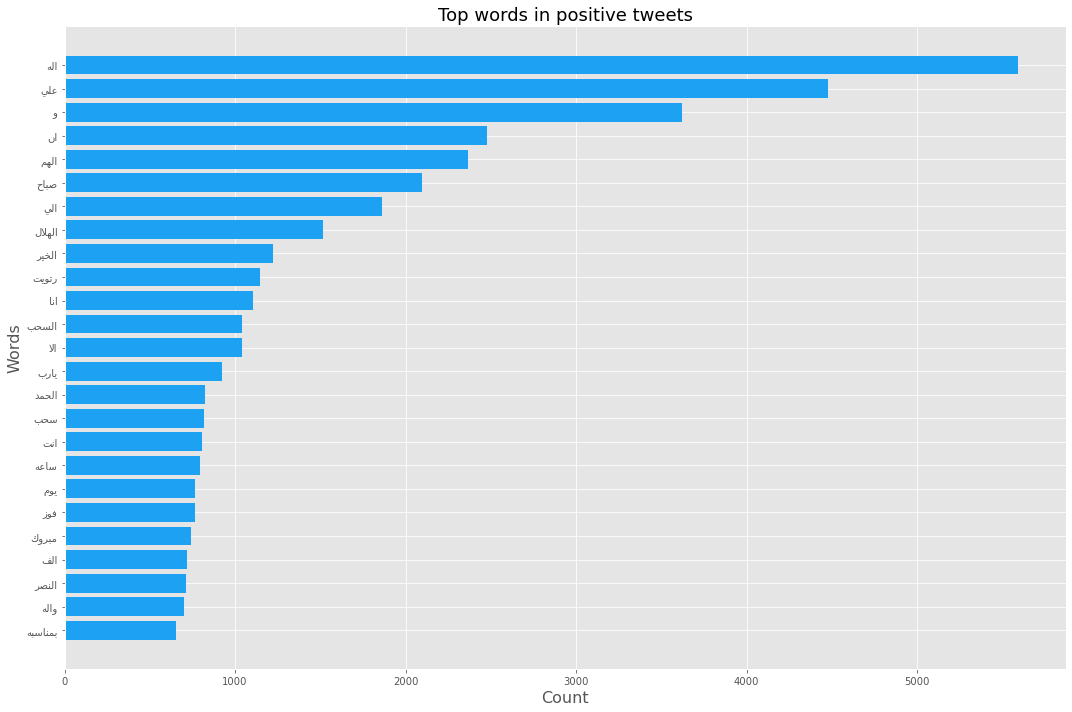

In [50]:
word_counter_df=pd.DataFrame(list(zip(words, counts)),
               columns =['word', 'freq'])
word_counter_df['disp'] = word_counter_df.word.apply(arabic_reshaper.reshape).apply(get_display)
# word_counter_df.plot.bar(x="disp", y="freq")
fig, ax= plt.subplots(figsize=(15, 10))
plt.barh(word_counter_df['disp'][::-1], word_counter_df['freq'][::-1], color='#1da1f2ff')
plt.title('Top words in positive tweets', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Words', fontsize=16)
plt.tight_layout()
plt.savefig('image/postive_top_words.jpg');

# Arabic_tweets_negative dataset

In [51]:
cols = ['class','tweet_text']
negative = pd.read_csv('data/Arabic_tweets_negative_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [52]:
negative.head(50)

,class,tweet_text
0,neg,رحمه الله رحمه واسعه واسكنه فسيح جناته 😢
1,neg,راح فين كلامك الي كنتي بتقوليه 💔 رايكو في صوتي
2,neg,كلام اهلها انهم دخلوها مستشفى الامل لمدة شهر ع...
3,neg,ليش عم تسبنا يامخرف 😡
4,neg,#السعاده_دايما_هي اشتقت ل حديثك ، و كأني لم اح...
5,neg,الله يستر 💔 والله مو قادرة أتخيل سيناريو الخسارة
6,neg,حقيقي احس بشيء من الحزن لما اشوف اولاد او بنات...
7,neg,من اول .. مو من الحين 🌚
8,neg,اشفيه صالح غيمه 😞
9,neg,بموت ضحك بتس لهم ثلاث سنوات عشان يحولون الناس ...


# Total no. of negative twittes

In [53]:
len(negative)

28326

# Sample of the negative twittes text

In [54]:
negative['tweet_text'].head()

0             رحمه الله رحمه واسعه واسكنه فسيح جناته 😢
1       راح فين كلامك الي كنتي بتقوليه 💔 رايكو في صوتي
2    كلام اهلها انهم دخلوها مستشفى الامل لمدة شهر ع...
3                                ليش عم تسبنا يامخرف 😡
4    #السعاده_دايما_هي اشتقت ل حديثك ، و كأني لم اح...
Name: tweet_text, dtype: object

# Sample of the target 

In [55]:
negative['class'].head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [56]:
np.sum(negative.isnull().any(axis=1))

0

# EDA

In [57]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28326 entries, 0 to 28325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       28326 non-null  object
 1   tweet_text  28326 non-null  object
dtypes: object(2)
memory usage: 442.7+ KB


# Cleaning the text

In [58]:
for letter in '#.][!XRﷺ':
    negative['tweet_text'] = negative['tweet_text'].astype(str).str.replace(letter,'')

In [59]:
negative.head(25)

,class,tweet_text
0,neg,رحمه الله رحمه واسعه واسكنه فسيح جناته 😢
1,neg,راح فين كلامك الي كنتي بتقوليه 💔 رايكو في صوتي
2,neg,كلام اهلها انهم دخلوها مستشفى الامل لمدة شهر ع...
3,neg,ليش عم تسبنا يامخرف 😡
4,neg,السعاده_دايما_هي اشتقت ل حديثك ، و كأني لم احا...
5,neg,الله يستر 💔 والله مو قادرة أتخيل سيناريو الخسارة
6,neg,حقيقي احس بشيء من الحزن لما اشوف اولاد او بنات...
7,neg,من اول مو من الحين 🌚
8,neg,اشفيه صالح غيمه 😞
9,neg,بموت ضحك بتس لهم ثلاث سنوات عشان يحولون الناس ...


In [60]:
def processPost(tweet): 

    #delete @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #delete www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    tweet = re.sub(r'\s*[A-Za-z]+\b', '' , tweet)
    tweet = tweet.rstrip()
    
    return tweet

In [61]:
# apply used to call the method processpost
negative["tweet_text"] = negative['tweet_text'].apply(lambda x: processPost(x)) 

splits a string into substrings using a regular expression

In [62]:
tokenizer = RegexpTokenizer(r'\w+')
negative["tweet_text"] = negative["tweet_text"].apply(tokenizer.tokenize)

In [63]:
negative["tweet_text"].head()

0        [رحمه, اله, رحمه, واسعه, واسكنه, فسيح, جناته]
1    [راح, فين, كلامك, الي, كنتي, بتقوليه, رايكو, ف...
2    [كلام, اهلها, انهم, دخلوها, مستشفي, الامل, لمد...
3                             [ليش, عم, تسبنا, يامخرف]
4    [السعادهدايماهي, اشتقت, ل, حديثك, و, كاني, لم,...
Name: tweet_text, dtype: object

In [64]:
stopwords_list = stopwords.words('arabic')
w=['و', 'ان', 'ع', 'اذا', 'او', 'الا', 'ف']
for i in w:
    stopwords_list.append(i)

In [65]:
negative["tweet_text"]=negative["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [66]:
negative['tweet_text'].head(25)

0         [رحمه, اله, رحمه, واسعه, واسكنه, فسيح, جناته]
1     [راح, فين, كلامك, الي, كنتي, بتقوليه, رايكو, ص...
2     [كلام, اهلها, انهم, دخلوها, مستشفي, الامل, لمد...
3                              [ليش, عم, تسبنا, يامخرف]
4     [السعادهدايماهي, اشتقت, ل, حديثك, كاني, احادثك...
5     [اله, يستر, واله, مو, قادره, اتخيل, سيناريو, ا...
6     [حقيقي, احس, بشيء, الحزن, اشوف, اولاد, بنات, م...
7                                      [اول, مو, الحين]
8                                   [اشفيه, صالح, غيمه]
9     [بموت, ضحك, بتس, ثلاث, سنوات, عشان, يحولون, ال...
10    [قبضوا, امنجي, نقطه, تفتيش, معاه, مسدس, قيل, م...
11    [القهوه, الي, كنت, اسويها, طلعت, خطا, الطريقه,...
12                           [اقبل, اعتذار, زعلت, خلاص]
13                        [انا, داريه, منك, رجا, باليز]
14    [اراجوز, بضحك, خلق, اله, بكي, بعيد, عين, صحابي...
15    [الحلقه, التاسعه, والعشرون, السيره, النبويه, ت...
16    [قبل, رمضان, 2019140, انا, اسف, زعلتك, انا, اس...
17    [الاشياء, حياتنا, زجاجيه, التكوين, اصيبت, 

# Negative tweets text information

In [67]:
all_words = [word for tokens in negative["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in negative["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(VOCAB)}')
print(f'Max sentence length {max(sentence_lengths)}')

262242 words total, with a vocabulary size of 42686
Max sentence length 821


# # Top 25 words in negative comments

In [68]:
counter_n = Counter(all_words)

In [69]:
counter_n.most_common(135
                     )

[('اله', 3170),
 ('علي', 2684),
 ('الي', 2430),
 ('انا', 2024),
 ('واله', 1393),
 ('الهم', 837),
 ('الناس', 723),
 ('انت', 717),
 ('مو', 677),
 ('اي', 667),
 ('كان', 656),
 ('قبل', 637),
 ('صباح', 618),
 ('مش', 618),
 ('يوم', 608),
 ('شي', 606),
 ('عشان', 590),
 ('يارب', 590),
 ('يعني', 585),
 ('مافي', 573),
 ('اني', 573),
 ('دي', 534),
 ('حتي', 529),
 ('احد', 505),
 ('اليوم', 479),
 ('مره', 471),
 ('واحد', 470),
 ('م', 460),
 ('الاتحاد', 459),
 ('وانا', 452),
 ('الهلال', 445),
 ('انه', 434),
 ('الخير', 425),
 ('قلبي', 412),
 ('فض', 411),
 ('ال', 409),
 ('الام', 404),
 ('سنه', 401),
 ('اكثر', 390),
 ('ب', 387),
 ('باله', 382),
 ('ي', 380),
 ('اول', 372),
 ('كنت', 370),
 ('اليله', 353),
 ('جدا', 349),
 ('ليش', 346),
 ('ليه', 334),
 ('حاجه', 328),
 ('ارحم', 327),
 ('وش', 323),
 ('القلب', 309),
 ('متي', 308),
 ('فيك', 307),
 ('المهنين', 303),
 ('انك', 301),
 ('تجمع', 301),
 ('قال', 299),
 ('عليكم', 297),
 ('ه', 292),
 ('نفس', 285),
 ('بكي', 284),
 ('توجيه', 277),
 ('اعتصام', 276),
 ('سودا

In [70]:
words = []
counts = []
for letter, count in counter_n.most_common(25):
    words.append(letter)
    counts.append(count)

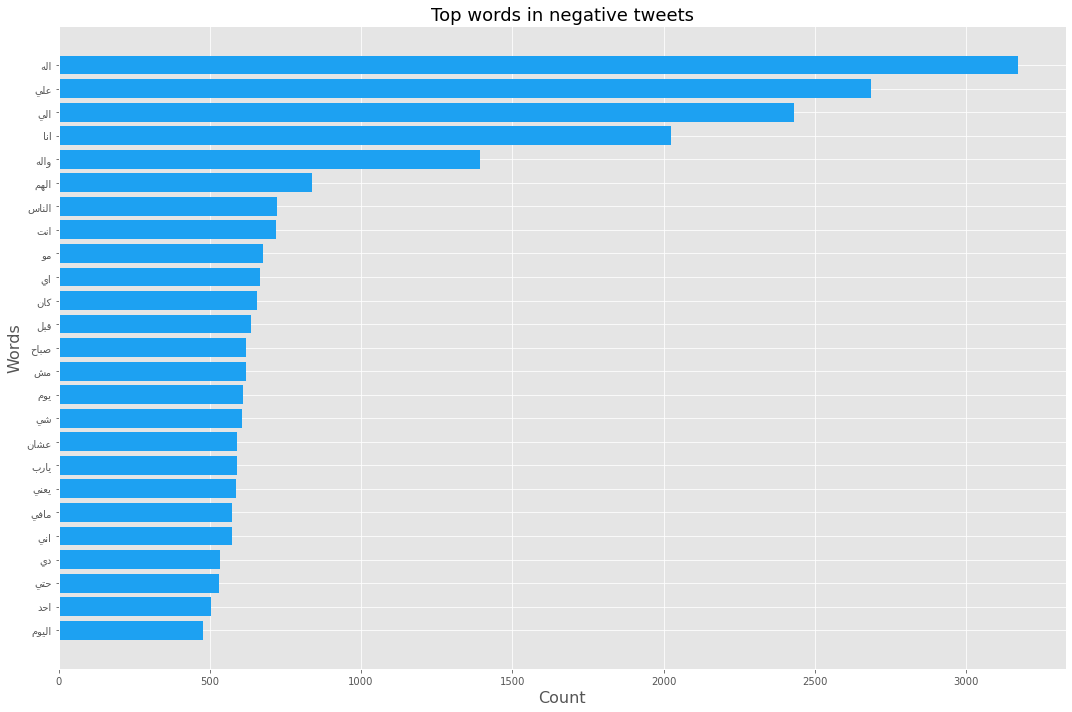

In [71]:
word_counter_n=pd.DataFrame(list(zip(words, counts)),
               columns =['word', 'freq'])
word_counter_n['disp'] = word_counter_n.word.apply(arabic_reshaper.reshape).apply(get_display)
# word_counter_df.plot.bar(x="disp", y="freq")
fig, ax=plt.subplots(figsize=(15,10))
ax.barh(word_counter_n.disp[::-1], word_counter_n.freq[::-1], color='#1da1f2ff')
plt.title('Top words in negative tweets', fontsize=18)
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Words', fontsize=16)
plt.tight_layout()
plt.savefig('image/negative_top_words.jpg');

In [81]:
top_pword= counter.most_common(50)
top_nword=counter_n.most_common(50)
lst=[]
lst2=[]
for tup1 in top_pword:
    lst.append(tup1[0])
    
for tup2 in top_nword:
    lst2.append(tup2[0])




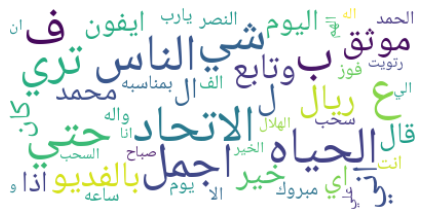

In [82]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_words=' '.join(tweet for tweet in lst)
word_cloud = WordCloud(font_path='Noto-unhinted/NotoNaskhArabic-Regular.ttf',stopwords=STOPWORDS, background_color="white", max_font_size=50, max_words=100)
word_cloud = word_cloud.generate_from_text(get_display(arabic_reshaper.reshape(all_words)))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('image/pwordcloud.jpg')
plt.show()



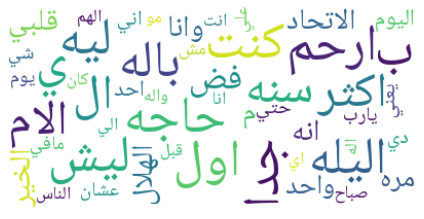

In [83]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_words=' '.join(tweet for tweet in lst2)
word_cloud = WordCloud(font_path='Noto-unhinted/NotoNaskhArabic-Regular.ttf',stopwords=STOPWORDS, background_color="white", max_font_size=50, max_words=50)
word_cloud = word_cloud.generate_from_text(get_display(arabic_reshaper.reshape(all_words)))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('image/nwordcloud.jpg')
plt.show()



# Prepare the Final Data

concatenate the postive and negative classes

In [84]:
full_data = pd.concat([positive, negative], axis=0, ignore_index=True)

In [85]:
full_data.head(-50)

,class,tweet_text
0,pos,"[اله, قفل, ميتينك]"
1,pos,"[طيار, عراقي, يسال, برج, المراقبه, سلطنه, عمان..."
2,pos,"[علمهم, تكفي, حسبي, اله, عليهم]"
3,pos,"[وعن, ذكر, اله, تغفلون, اله, الا, اله, اله, ال..."
4,pos,"[كثير, جمهور, الاهلي, يقول, عطنا, تشكيله, الهل..."
...,...,...
56807,neg,"[الناس, الطبيعيه, بصداقتهم, تقول, احنا, مقربين..."
56808,neg,"[يمكن, النت, حقها, خلص]"
56809,neg,"[المقطع, صباح, لازم, اسمعه, صار, اساسيات, حياتي]"
56810,neg,"[كانها, كيكتك, انتي]"


In [86]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56862 entries, 0 to 56861
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       56862 non-null  object
 1   tweet_text  56862 non-null  object
dtypes: object(2)
memory usage: 888.6+ KB


In [87]:
len(full_data)

56862

In [88]:
y=full_data['class']
y.value_counts()

pos    28536
neg    28326
Name: class, dtype: int64

# Showing how the dataset is balance

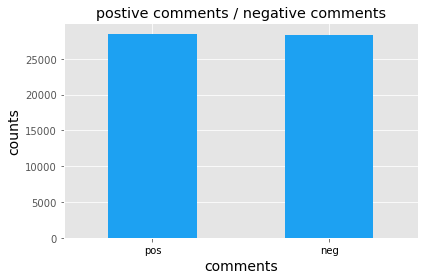

<Figure size 432x288 with 0 Axes>

In [96]:
full_data['class'].value_counts().plot(kind='bar', color='#1da1f2ff')
plt.title('postive comments / negative comments', color='black')
plt.xlabel('comments', fontsize=14, color='black')
plt.ylabel('counts', fontsize=14, color='black')
plt.xticks(color='black', rotation=0)
plt.savefig('image/balance_data.jpg')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/balance_data.jpg', dpi=100);

# Convert class values (pos, neg) to (1,0) 

In [97]:
pro= preprocessing.LabelEncoder()
enc_pro=pro.fit_transform(full_data['class'])
full_data['class'] = enc_pro


# Save the final dataset

In [98]:
full_data.to_pickle('full_df.pickle')

In [2]:
full_df = pd.read_pickle('data/full_df.pickle')
full_df.head(-50)

,class,tweet_text
0,1,"[اله, قفل, ميتينك]"
1,1,"[طيار, عراقي, يسال, برج, المراقبه, سلطنه, عمان..."
2,1,"[علمهم, تكفي, حسبي, اله, عليهم]"
3,1,"[وعن, ذكر, اله, تغفلون, اله, الا, اله, اله, ال..."
4,1,"[كثير, جمهور, الاهلي, يقول, عطنا, تشكيله, الهل..."
...,...,...
56807,0,"[الناس, الطبيعيه, بصداقتهم, تقول, احنا, مقربين..."
56808,0,"[يمكن, النت, حقها, خلص]"
56809,0,"[المقطع, صباح, لازم, اسمعه, صار, اساسيات, حياتي]"
56810,0,"[كانها, كيكتك, انتي]"


In [100]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56862 entries, 0 to 56861
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       56862 non-null  int64 
 1   tweet_text  56862 non-null  object
dtypes: int64(1), object(1)
memory usage: 888.6+ KB


In [234]:
full_df['length']

0         3
1        12
2         5
3        20
4        19
         ..
56857    13
56858    13
56859     2
56860    10
56861     6
Name: length, Length: 56862, dtype: int64

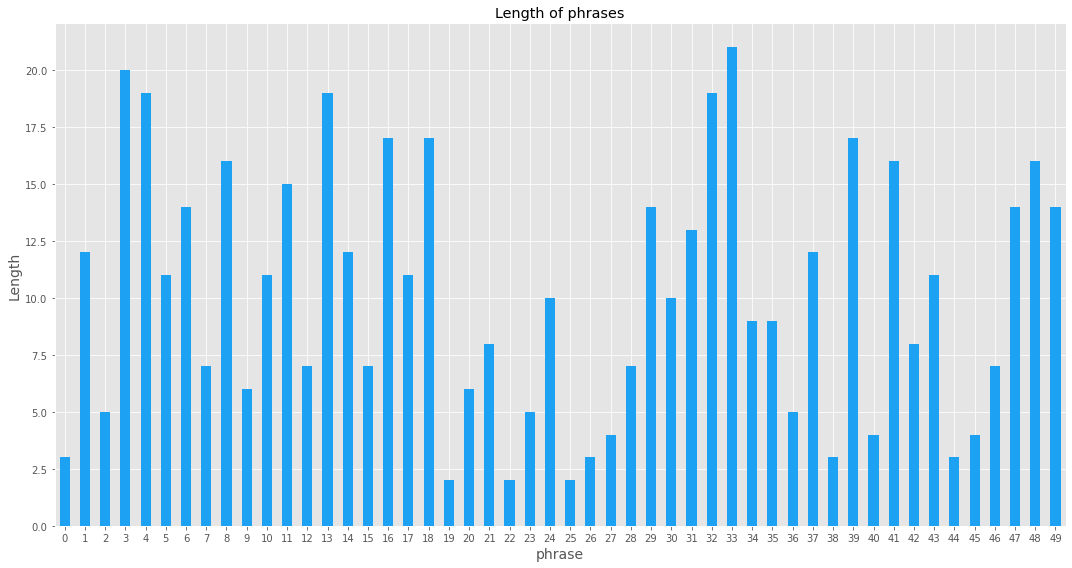

<Figure size 432x288 with 0 Axes>

In [235]:
ax, fig= plt.subplots(figsize=(15, 8))
full_df['length'][:50].plot(kind='bar', color='#1da1f2ff')
plt.title('Length of phrases')
plt.xlabel('phrase', fontsize=14)
plt.ylabel('Length', fontsize=14)
plt.xticks(rotation=0)
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/phrase_length.jpg', dpi=100)

# Machine Learning part

# TFIDF

In [3]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

word_vec= word_vectorizer.fit_transform(full_df['tweet_text'].astype('str'))
word_vec = word_vec.toarray()

vocab = word_vectorizer.get_feature_names()
word_vec_features=pd.DataFrame(word_vec, columns=vocab)
word_vec_features.head(10)

,10,15,16,1953,30,30م,40,412,413,419,...,ٳنك,کل,ڪل,ڪن,گثيرا,ۆفيما,ۈل,یبقی,یوم,ฬw
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y=full_df['class']
X=word_vec_features

In [5]:
X.shape, y.shape

((56862, 10000), (56862,))

# Spliting Dataset into 80% Training and 20% Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
scores = []

In [7]:
y_test.value_counts()

1    5749
0    5624
Name: class, dtype: int64

# Machine Learning Algorithms

# 1- Naive Bayes Algorithm

A- Multinomial Naive Bayes algorthim

In [8]:
mnb=MultinomialNB()
mnb=mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
mnb_1=mnb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(mnb.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))
scores.append(round(mnb_1, 3))

Accuracy= 0.763
Precision= 0.780
Recall= 0.740
F1= 0.760


B- Gaussian Naive Bayes algorthim

In [9]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.734
Precision= 0.840
Recall= 0.590
F1= 0.690


In [10]:
scores.append(round(nb_1, 3))
scores

[0.763, 0.734]

# 2- Ridge Classifier

In [11]:
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.777
Precision= 0.800
Recall= 0.740
F1= 0.770


In [12]:
scores.append(round(rc_1, 3))
scores

[0.763, 0.734, 0.777]

# 3- LogisticRegression Algorithm

Using C=1 which is regularization and it is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

In [13]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.781
Precision= 0.810
Recall= 0.730
F1= 0.770


In [117]:
scores.append(round(lr_1, 3))
scores

[0.763, 0.734, 0.777, 0.781]

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(4664, 960, 1527, 4222)

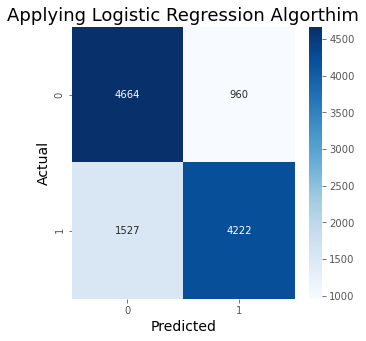

In [47]:
# cm = confusion_matrix(y_test, y_pred)
# cm_df = pd.DataFrame(cm, index = [f'class{i}' for i in LR.class], columns = [f'class{i}' for i in LR.class])
# cm_df = cm_df/cm_df[cm_df.columns].sum()
# cm_df[cm_df == 0] = np.nan
fig, ax = plt.subplots(1, figsize = (5,5))
hm=sns.color_palette("Blues", as_cmap=True)
sns.heatmap([[tn, fp], [fn, tp]], annot=True,fmt="d", cmap=hm)
ax.set_title('Applying Logistic Regression Algorthim', fontsize=18)
ax.set_xlabel('Predicted', fontsize=14, color='black')
ax.set_ylabel('Actual', fontsize=14, color='black');

# 4- Random Foreset Algorthim

In [118]:
RF=RandomForestClassifier(max_depth=5, n_estimators=100)
RF= RF.fit(X_train , y_train)
y_pred = RF.predict(X_test)
RF_1=RF.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RF.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.664
Precision= 0.790
Recall= 0.460
F1= 0.580


In [119]:
scores.append(round(RF_1, 3))
scores

[0.763, 0.734, 0.777, 0.781, 0.664]

# Deep Learning

Multi layer perseptron

In [125]:
# first neural network with keras tutorial

# define the keras model

model = Sequential()
model.add(Dense(16, input_dim=10000, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#using early stop
es_callback = EarlyStopping(monitor='val_loss', patience=3)
# fit the keras model on the dataset
history=model.fit(X_train, y_train, callbacks=[es_callback], validation_data=(X_test, y_test), epochs=65, batch_size=64)


Epoch 1/65
711/711 [==============================] - 3s 3ms/step - loss: 0.6245 - accuracy: 0.6430 - val_loss: 0.4984 - val_accuracy: 0.7709
Epoch 2/65
711/711 [==============================] - 2s 2ms/step - loss: 0.5081 - accuracy: 0.7552 - val_loss: 0.4471 - val_accuracy: 0.7836
Epoch 3/65
711/711 [==============================] - 2s 2ms/step - loss: 0.4645 - accuracy: 0.7807 - val_loss: 0.4307 - val_accuracy: 0.7836
Epoch 4/65
711/711 [==============================] - 2s 2ms/step - loss: 0.4392 - accuracy: 0.7962 - val_loss: 0.4226 - val_accuracy: 0.7870
Epoch 5/65
711/711 [==============================] - 2s 3ms/step - loss: 0.4212 - accuracy: 0.8053 - val_loss: 0.4207 - val_accuracy: 0.7867
Epoch 6/65
711/711 [==============================] - 2s 3ms/step - loss: 0.4031 - accuracy: 0.8157 - val_loss: 0.4220 - val_accuracy: 0.7915
Epoch 7/65
711/711 [==============================] - 2s 3ms/step - loss: 0.3918 - accuracy: 0.8213 - val_loss: 0.4308 - val_accuracy: 0.7921
Epoch 

In [126]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


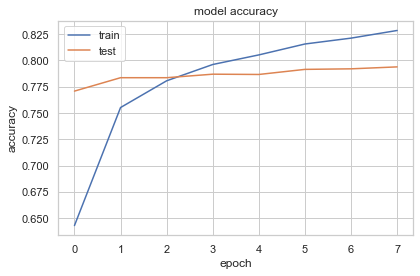

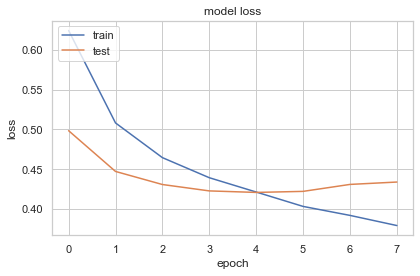

<Figure size 432x288 with 0 Axes>

In [155]:
# Fit the model
# history = model.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/model_accuracy.jpg')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig2= plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig2.savefig('image/model_loss.jpg')

In [130]:
# evaluate
acc = model.evaluate(X_test, y_test)
scores.append(round(acc[1],3))
round(acc[1],3)

356/356 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7939


0.794

# Algorithms Results comparison

In [131]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on Accuracy")
x.field_names = ["Model", "Accuracy"]

x.add_row(["Multinomail Naive Bayes Algorithm", round(mnb_1,3)])
x.add_row(["Naive Bayes Algorithm", round(nb_1,3)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1,3)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,3)])
x.add_row(["Random Forest Algorithm", round(RF_1,3)])
x.add_row(["Multilayer Perseptrone", round(acc[1],3)])

print(x)
print('\n')



Comparison of all algorithms on Accuracy
+-----------------------------------+----------+
|               Model               | Accuracy |
+-----------------------------------+----------+
| Multinomail Naive Bayes Algorithm |  0.763   |
|       Naive Bayes Algorithm       |  0.734   |
|     Ridge Classifier Algorithm    |  0.777   |
|   Logistic Regression Algorithm   |  0.781   |
|      Random Forest Algorithm      |  0.664   |
|       Multilayer Perseptrone      |  0.794   |
+-----------------------------------+----------+




# Plot the caomparision between models scores

In [132]:
names = ["Multinomial_NB", "Gaussian_Process", "Ridge_classifier", "logstic_regression",
         "Random_Forest","Multi_layer_perseptron"]
df = pd.DataFrame(list(zip(names,scores)),
               columns =['Name', 'accuracy'])
df



,Name,accuracy
0,Multinomial_NB,0.763
1,Gaussian_Process,0.734
2,Ridge_classifier,0.777
3,logstic_regression,0.781
4,Random_Forest,0.664
5,Multi_layer_perseptron,0.794


In [133]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Name,accuracy
0,Multinomial_NB,0.763000
1,Gaussian_Process,0.734000
2,Ridge_classifier,0.777000
3,logstic_regression,0.781000
4,Random_Forest,0.664000
5,Multi_layer_perseptron,0.794000


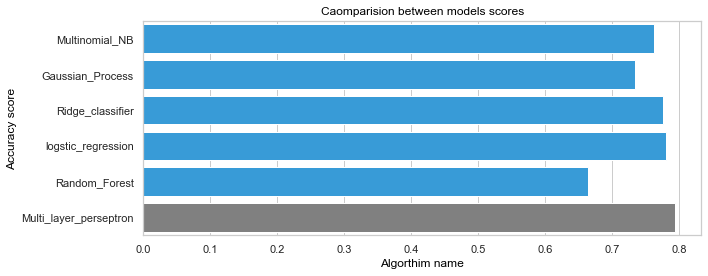

<Figure size 432x288 with 0 Axes>

In [154]:
fig, ax=plt.subplots(figsize=(10,4))
# sns.set(style="whitegrid", color='blue')
ax = sns.barplot(y="Name", x="accuracy", data=df, color='#1da1f2ff', palette=["#1da1f2ff" if x!='Multi_layer_perseptron' else 'gray' for x in df.Name])
plt.title('Caomparision between models scores', color='black')
plt.xlabel('Algorthim name', color='black')
plt.ylabel('Accuracy score', color='black')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/model_comparision.jpg');

In [41]:
RC =LogisticRegression(penalty = 'l2')
RC.fit(X_train,y_train)

LogisticRegression()

In [121]:
twt=['اشتقت ل حديثك ، و كأني لم احادثك منذ سنين 💔']

In [122]:
x = word_vectorizer.transform(twt)

In [123]:
pred=RC.predict(x)
# pred=pro.inverse_transform(pred)
# prediction=pd.DataFrame(pred, columns=['Prediction']) 
if pred >= 1:
    print('positive')
else:
    print('negative')

pred

negative


array([0])

# Using the model to predict the class of new tweets

In [58]:
twt=['بعد كل الحب وعشرة السنين انفصلو وتركو بعض وانتهى حبهم']
x = word_vectorizer.transform(twt)

In [59]:
x.sort_indices()
pred=model.predict(x)
if pred >= 0.5:
    print('positive')
else:
    print('negative')

pred

negative


array([[0.4965489]], dtype=float32)